In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(13)

In [5]:
# Fake Data
nsample = 100
x = np.linspace(0,10,100)
X = np.column_stack((x, x**2))
beta = np.array([1,0.1, 10])
e = np.random.normal(size=nsample)
X = sm.add_constant(X)
y = np.dot(X, beta) + e

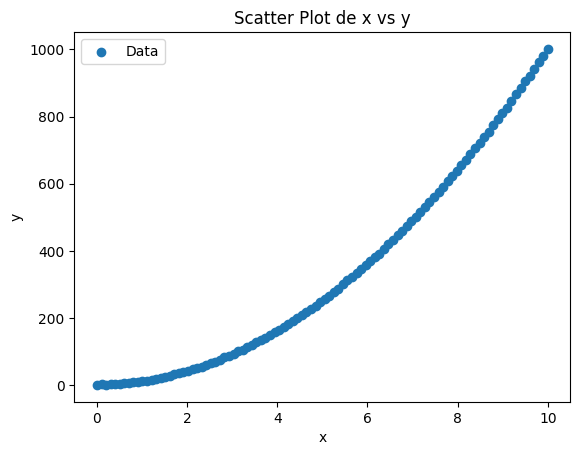

In [6]:
# Gráfico
plt.scatter(x, y, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot de x vs y')
plt.legend()
plt.show()

In [7]:
# Model fit and Summary
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.174e+06
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          1.38e-244
Time:                        16:07:10   Log-Likelihood:                -133.89
No. Observations:                 100   AIC:                             273.8
Df Residuals:                      97   BIC:                             281.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3585      0.276      4.928      0.0

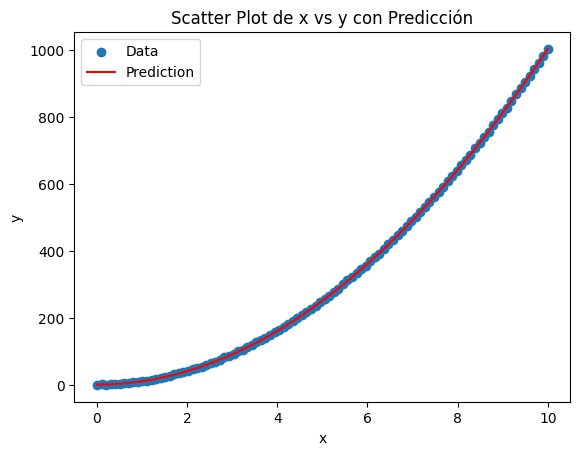

In [8]:
# Predicciones
y_pred = res.predict(X)

# Gráfico de datos observados y predicciones
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot de x vs y con Predicción')
plt.legend()
plt.show()

# OLS non linear curve but linear in parameter

In [9]:
# fake data
nsample = 100
sig = 0.5
x = np.linspace(0,20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = np.array([0.5, 0.5, -0.02, 5.])
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample) 

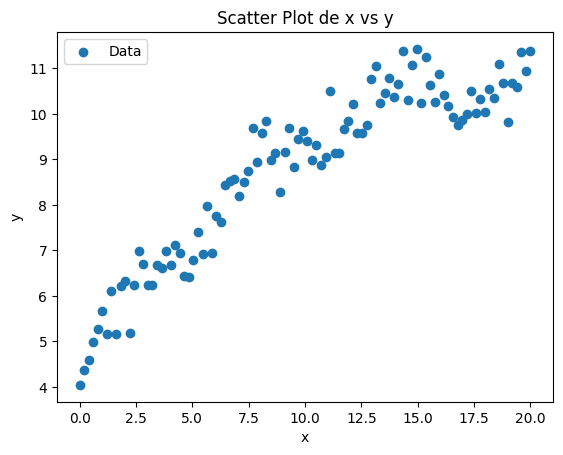

In [10]:
# Gráfico
plt.scatter(x, y, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot de x vs y')
plt.legend()
plt.show()

In [11]:
# Model fit and Summary
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     719.7
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           1.22e-65
Time:                        16:07:12   Log-Likelihood:                -49.444
No. Observations:                 100   AIC:                             106.9
Df Residuals:                      96   BIC:                             117.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5130      0.015     33.495      0.0

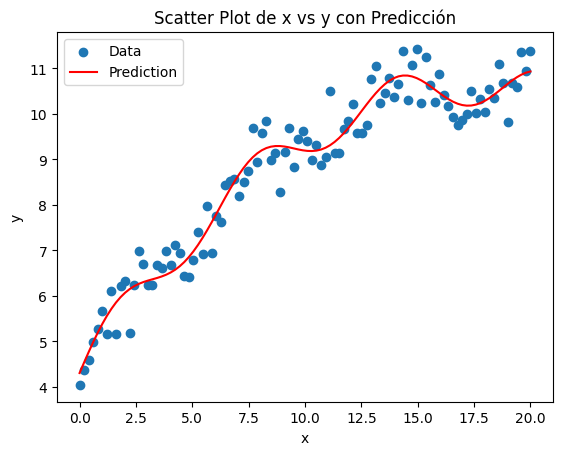

In [12]:
# Predicciones
y_pred = res.predict(X)

# Gráfico de datos observados y predicciones
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot de x vs y con Predicción')
plt.legend()
plt.show()

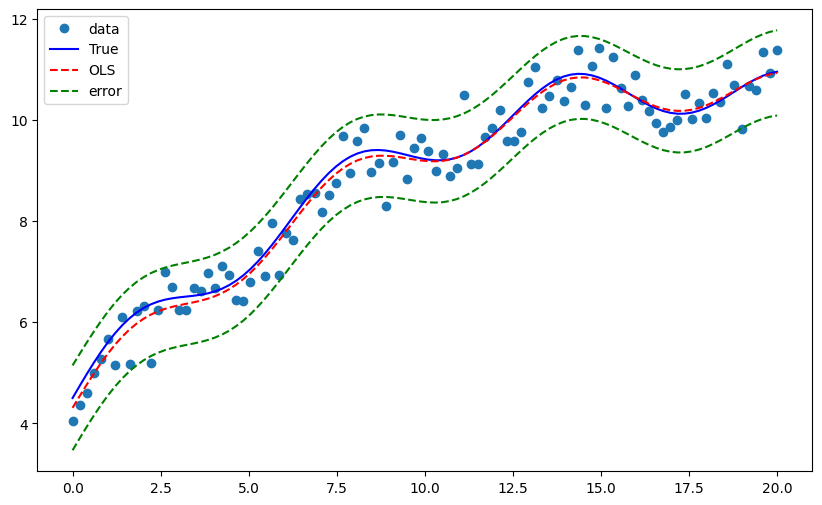

In [13]:
def plot_compare(res, x, y, y_true):
    prstd, iv_1, iv_u = wls_prediction_std(res)
    fig, ax = plt.subplots(figsize=(10,6))  # Crear una figura y un conjunto de ejes
    ax.plot(x, y, 'o', label='data')  # Dibujar puntos de datos
    ax.plot(x, y_true, 'b-', label="True")  # Dibujar la línea de los valores verdaderos
    ax.plot(x, res.fittedvalues, 'r--', label="OLS")  # Dibujar la línea de los valores ajustados por OLS
    ax.plot(x, iv_u, 'g--', label="error")  # Dibujar las barras de error superiores
    ax.plot(x, iv_1, 'g--')  # Dibujar las barras de error inferiores
    ax.legend()  # Mostrar leyendas
    plt.show()  # Mostrar el gráfico

# Suponiendo que has definido x, y, y_true y res en otro lugar de tu código
plot_compare(res, x, y, y_true)  # Llamar a la función plot_compare con los datos y resultados
